In [1]:
%matplotlib inline
# Program for assignment 4
# Import modules

import numpy as np
import cv2
#from image_functions import *
import sys, os
import argparse
import imutils
from imutils import paths
from matplotlib import pyplot as plt
np.set_printoptions(precision=4)

In [2]:
img_path = "/home/utkarsh/Documents/CV/assign_4/input_images/2/im2.png"
disp_path = "/home/utkarsh/Documents/CV/assign_4/input_images/2/disp2.png"
img2_path = "/home/utkarsh/Documents/CV/assign_4/input_images/6/im6.png"

In [3]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
disp = cv2.imread(disp_path)
disp = cv2.cvtColor(disp, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread(img2_path)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

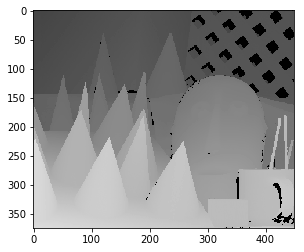

In [4]:
plt.imshow(disp, cmap="gray", vmin=0, vmax=255)

In [5]:
def get_blur_radius(depth):
    blur_radius = int(-0.1490196 * depth + 39)
    if blur_radius % 2 == 0:
        blur_radius += 1
    return blur_radius

In [6]:
def get_mask(img, init, fin):
    mask = cv2.inRange(img, init, fin)
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    return mask

In [47]:
def shift_mask(mask, disparity, factor=4, right=True):
    shift = int(disparity / factor)
    rows, cols, depth = mask.shape
    if right:
        shift = -shift
    M = np.float32([[1, 0, shift], [0, 1, 0]])
    mask = cv2.warpAffine(mask, M, (cols, rows))
    return mask

In [48]:
def get_defocused_image(img, disp):
    result = img[:]
    for i in range(0, 256):
        blur_radius = get_blur_radius(i)
        blurred_img = cv2.GaussianBlur(img, (blur_radius, blur_radius), 0)
        mask = get_mask(disp, i, i)
        result = np.where(mask == (255, 255, 255), blurred_img, result)
    return result

In [71]:
def get_other_defocused_image(img, disp, factor=4, right=True):
    result = img[:]
    for i in range(0, 256):
        blur_radius = get_blur_radius(i)
        blurred_img = cv2.GaussianBlur(img, (blur_radius, blur_radius), 0)
        mask = get_mask(disp, i, i)
        mask = shift_mask(mask, i, factor=factor, right=right)
        result = np.where(mask == (255, 255, 255), blurred_img, result)
    return result

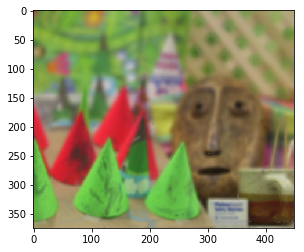

In [68]:
result = get_defocused_image(img, disp)
plt.imshow(result)

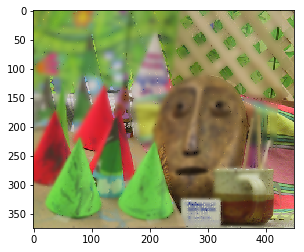

In [75]:
plt.imshow(get_other_defocused_image(img2, disp))